In [59]:
%pylab inline
import scipy.stats as stats
import numpy as np
import scipy
from scipy import special

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<ul>
<li>El experimento numérico a evaluar en este punto será una marcha aleatoria en 1D. donde la posicion inicial es $x=0$., se daran 50 pasos.
</li>
<li>Se haran 5000 experimentos, donde en cada experimento se hacen 5000 caminatas.la media de las posiciones finales debería ser 0.
</li>
<li>Se realiza una prueba de hipótesis basados en el proceso descrito <a href="https://onlinecourses.science.psu.edu/stat200/node/54"> aca</a>, Donde: La hipótesis nula es: $$H_0:\bar{\mu} = 0$$ La hipótesis alterna es:$$H_1:\bar{\mu} \neq 0$$


<ul\>

In [44]:
num_exp = 5000
num_pasos = 50
p_val= zeros(num_exp)
t_estadisticos = zeros(num_exp)
mins = zeros(num_exp)
maxs = zeros(num_exp)
promedios = zeros(num_exp)
min_p = 5000
max_p = -5000
min_p_array = zeros(num_exp)
max_p_array = zeros(num_exp)

In [45]:
for k in range(num_exp):
    xfinal = zeros(num_exp)
    #Se realizan todos las caminatas
    for i in range(num_exp):
        x = 0
        #se realiza cada caminata aleatoria
        for j in range(num_pasos):
            mu, sigma = 0, 0.05
            paso = random.normal(mu, sigma)
            x = x + paso;
        xfinal[i] = x
    mu_expected = 0
    mu_observed = mean(xfinal)
    #desviacion estandar
    s = std(xfinal)
    n = len(xfinal)
    t_esta = (mu_observed - mu_expected)/(s/sqrt(n))
    #es un test de dos colas, ya que la desviacion del parametro estimado puede varias en dos direcciones
    p_val[k] = 2*stats.t.sf(abs(t_esta), n-1)
    t_estadisticos[k] = t_esta
    mins[k] = min(p_val[:k+1])
    maxs[k] = max(p_val[:k+1])
    promedios[k] = mean(p_val[:k+1])
    #se guarda el menos p-value y el maximo
    if p_val[k] < min_p:
        min_p = p_val[k]
        min_p_array = xfinal
    elif p_val[k] > max_p:
        max_p = p_val[k]
        max_p_array = xfinal

Veamos la distribucion de los valores que toma t

Promedio de t= -0.0113815516671


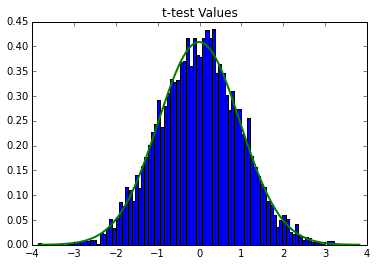

In [46]:
count, bins, ignored = plt.hist(t_estadisticos, 100, normed=True)

w=np.mean(t_estadisticos)
f=np.std(t_estadisticos)


plt.plot( bins, (1/np.sqrt(2*np.pi*f**2))*np.exp((-(bins-w)**2)/(2*(f**2))) ,
         linewidth=2, color='g')
plt.title('t-test Values')
print ('Promedio de t= '+str(w))
plt.show()

Para t positivo se ve si el valor está significativamente arriba de la media poblacional y para t negativo se ve si el valor está significativamente por debajo de la media poblacional, Si se quiere tener solamente una idea de la distancia de la media experimental a la esperada, se tiene la siguiente distribución:

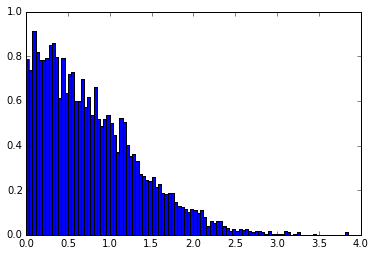

In [53]:
plt.hist(abs(t_estadisticos),100, normed=True)
plt.show()

Veamos como Varian el maximo, minimo y media de la distribucion de los p-values

Si el nivel de significancia de la prueba se toma de $5\%$, la hipótesis alterna puede recharzarse si el $p$ $value$ es mayor a $0.05$ . Note que el mínimo llega a ser menor a tal valor.

P value minimo= 0.000120448677413


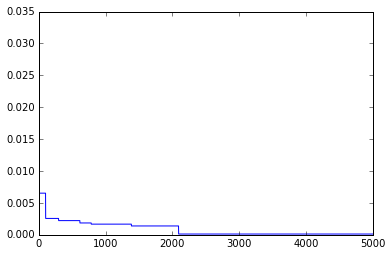

In [54]:
plot(mins)
print('P value minimo= '+str(min_p))

P value maximo= 0.999794092928


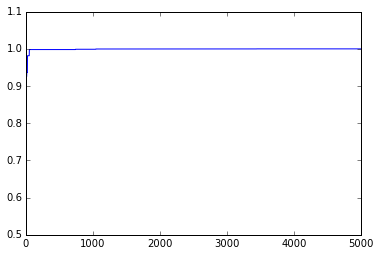

In [60]:
plt.plot(maxs)
plt.ylim(0.5,1.1)
print('P value maximo= '+str(max_p))

P value promedio= 0.509495775461


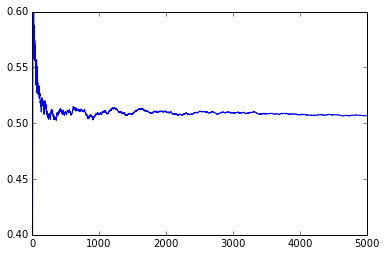

In [58]:
plt.plot(promedios)
plt.ylim(0.4,0.6)
print('P value promedio= '+str(mean(promedios)))